<a href="https://www.kaggle.com/code/sjagkoo7/visualization-ipl-2008-to-2020-am?scriptVersionId=132206849" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv
/kaggle/input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv


#   Reading Matches data set

In [2]:
Matches = pd.read_csv("/kaggle/input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv",index_col='id')

# Data Preprocessing

In [3]:

Matches.info()
Matches.columns
Matches.describe()
Matches.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 335982 to 1237181
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             803 non-null    object 
 1   date             816 non-null    object 
 2   player_of_match  812 non-null    object 
 3   venue            816 non-null    object 
 4   neutral_venue    816 non-null    int64  
 5   team1            816 non-null    object 
 6   team2            816 non-null    object 
 7   toss_winner      816 non-null    object 
 8   toss_decision    816 non-null    object 
 9   winner           812 non-null    object 
 10  result           812 non-null    object 
 11  result_margin    799 non-null    float64
 12  eliminator       812 non-null    object 
 13  method           19 non-null     object 
 14  umpire1          816 non-null    object 
 15  umpire2          816 non-null    object 
dtypes: float64(1), int64(1), object(14)
memory usage: 108

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
id,,,,,,,,,,,,,,,,
335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin
335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba
335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar
335990,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,NaN,Asad Rauf,MR Benson


# Deleting Method which is not useful

In [4]:
Matches.loc[Matches.method.notnull()]
Matches.drop(['method'],axis=1, inplace=True)
Matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 335982 to 1237181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             803 non-null    object 
 1   date             816 non-null    object 
 2   player_of_match  812 non-null    object 
 3   venue            816 non-null    object 
 4   neutral_venue    816 non-null    int64  
 5   team1            816 non-null    object 
 6   team2            816 non-null    object 
 7   toss_winner      816 non-null    object 
 8   toss_decision    816 non-null    object 
 9   winner           812 non-null    object 
 10  result           812 non-null    object 
 11  result_margin    799 non-null    float64
 12  eliminator       812 non-null    object 
 13  umpire1          816 non-null    object 
 14  umpire2          816 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 102.0+ KB


# Pie Graph on Winner Team

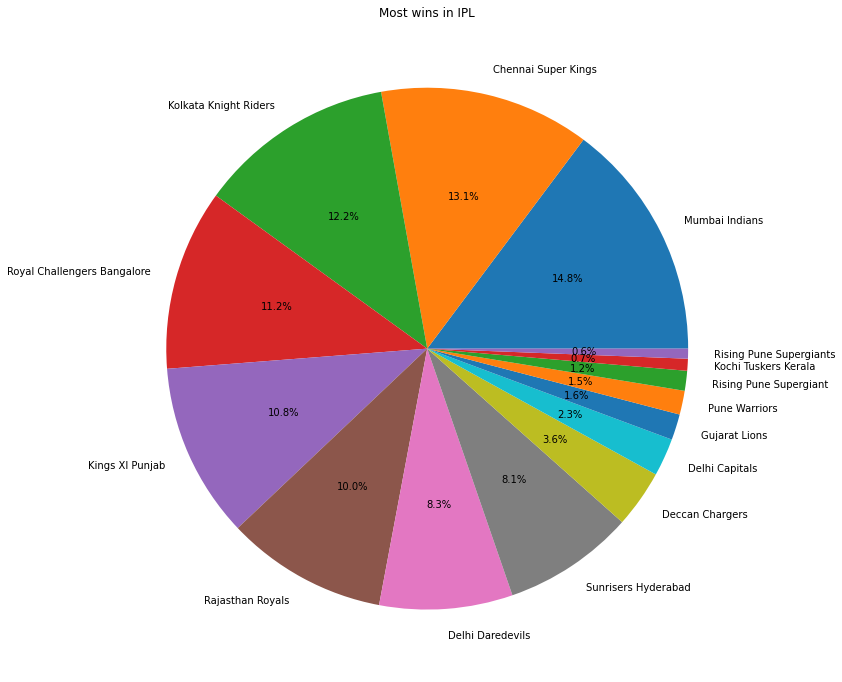

In [5]:
# win_team=pd.DataFrame({'winner':Matches['winner']})
# count_wins=win_team.value_counts()
# labels=[X[0] for X in count_wins.keys()]
# labels=count_wins.keys()
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(111)
ax.set(title='Most wins in IPL')
#plt.pie(x=count_wins,autopct='%.1f%%',labels=labels)
plt.pie(x=Matches['winner'].value_counts(),autopct='%.1f%%',labels=Matches['winner'].value_counts().index)
plt.show()

# Most wins in Eliminator
# Select two columns with conditional values
- http://net-informations.com/ds/pd/mcolumns.htm

In [6]:
Matches[['winner','eliminator']] [Matches['eliminator']=='Y'].value_counts()

winner                       eliminator
Kings XI Punjab              Y             3
Delhi Capitals               Y             2
Mumbai Indians               Y             2
Rajasthan Royals             Y             2
Royal Challengers Bangalore  Y             2
Kolkata Knight Riders        Y             1
Sunrisers Hyderabad          Y             1
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Rajasthan Royals'),
  Text(1, 0, 'Kings XI Punjab'),
  Text(2, 0, 'Sunrisers Hyderabad'),
  Text(3, 0, 'Royal Challengers Bangalore'),
  Text(4, 0, 'Mumbai Indians'),
  Text(5, 0, 'Delhi Capitals'),
  Text(6, 0, 'Kolkata Knight Riders')])

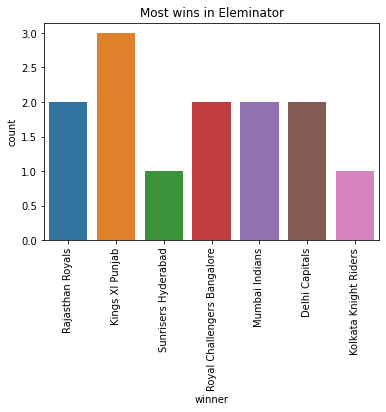

In [7]:
sns.countplot(Matches['winner'][Matches['eliminator']=='Y'])
plt.title('Most wins in Eleminator')
plt.xticks(rotation=90)

# Top 10 Famous Venue

In [8]:
Matches['venue'].value_counts()

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
M.Chinnaswamy Stadium                                   15
Kingsmead                                               

Text(0, 0.5, 'Venue')

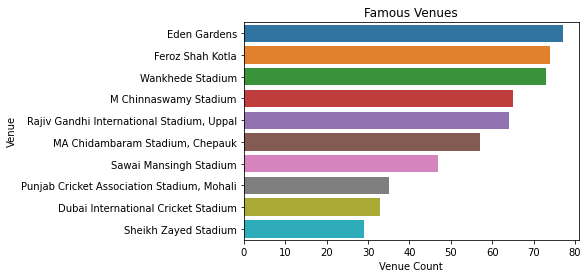

In [9]:
sns.barplot(x=Matches['venue'].value_counts().head(10),y=Matches['venue'].value_counts().head(10).index)
plt.title('Famous Venues')
plt.xlabel('Venue Count')
plt.ylabel('Venue')

# Top 5 Umpire 1 & Umpire 2

In [10]:
Matches['umpire1'].value_counts()

HDPK Dharmasena          78
AK Chaudhary             56
Asad Rauf                51
M Erasmus                40
Aleem Dar                38
BF Bowden                37
S Ravi                   37
BR Doctrove              34
CB Gaffaney              34
KN Ananthapadmanabhan    33
AY Dandekar              28
C Shamshuddin            22
NJ Llong                 21
Nitin Menon              20
RE Koertzen              20
S Asnani                 19
VA Kulkarni              19
BNJ Oxenford             16
JD Cloete                16
YC Barde                 14
A Nand Kishore           14
BG Jerling               13
RK Illingworth           13
SS Hazare                11
S Das                    10
MR Benson                10
K Hariharan              10
DJ Harper                 9
UV Gandhe                 8
CK Nandan                 8
IL Howell                 7
GAV Baxter                7
RM Deshpande              7
SJ Davis                  6
VK Sharma                 6
SD Fry              

Text(0, 0.5, 'Umpire1')

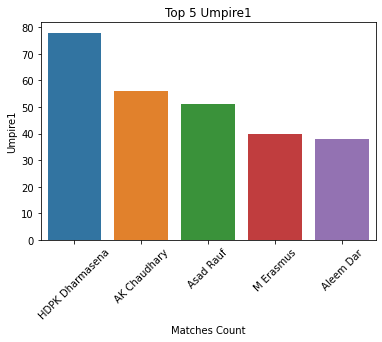

In [11]:
sns.barplot(x=Matches['umpire1'].value_counts().head(5).index,y=Matches['umpire1'].value_counts().head(5))
plt.title('Top 5 Umpire1')
plt.xticks(rotation=45)
plt.xlabel('Matches Count')
plt.ylabel('Umpire1')

In [12]:
Matches['umpire2'].value_counts()

S Ravi             84
C Shamshuddin      60
SJA Taufel         54
CK Nandan          49
RJ Tucker          41
Nitin Menon        37
BNJ Oxenford       32
VA Kulkarni        31
AK Chaudhary       31
RB Tiffin          30
SK Tarapore        26
M Erasmus          25
AM Saheba          23
RE Koertzen        21
VK Sharma          20
PR Reiffel         19
DJ Harper          18
RK Illingworth     18
HDPK Dharmasena    16
NJ Llong           16
CB Gaffaney        13
SL Shastri         13
K Srinath          13
K Hariharan        11
A Nand Kishore     11
S Asnani           11
BR Doctrove         8
PG Pathak           7
A Deshmukh          7
IL Howell           7
K Srinivasan        6
AL Hill             6
SS Hazare           6
I Shivram           6
GA Pratapkumar      6
S Das               5
TH Wijewardene      5
YC Barde            5
BG Jerling          4
AV Jayaprakash      4
IJ Gould            3
SD Ranade           2
MR Benson           2
Subroto Das         1
JD Cloete           1
SJ Davis  

Text(0, 0.5, 'Umpire2')

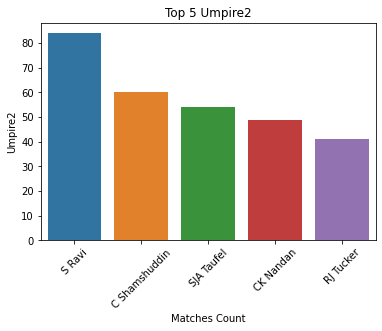

In [13]:
sns.barplot(x=Matches['umpire2'].value_counts().head(5).index,y=Matches['umpire2'].value_counts().head(5))
plt.title('Top 5 Umpire2')
plt.xticks(rotation=45)
plt.xlabel('Matches Count')
plt.ylabel('Umpire2')